In [1]:
from sklearn.decomposition import PCA
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
path = Path().resolve().parent / 'dataset' / 'input_20K' / 'processed'

df = pd.read_csv(Path().resolve().parent / 'dataset' / 'input_20K' / 'index_dict.csv')[['PO', 'idx']]
categories = dict(zip(sorted(df['PO'].unique()), range(len(df['PO'].unique()))))
df['label'] = df['PO'].map(categories)
df.sort_values(by=['idx'], inplace=True)
df = df[df.idx != 255334156]
df = df[df.idx != 886397269]

In [3]:
X = np.array([np.load(path / f'Bi2Te3-{i:08d}.npy')[:, 1] for i in df['idx']])
y = df['label'].values

In [4]:
X_pca = PCA(n_components=2).fit_transform(X)

In [5]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y

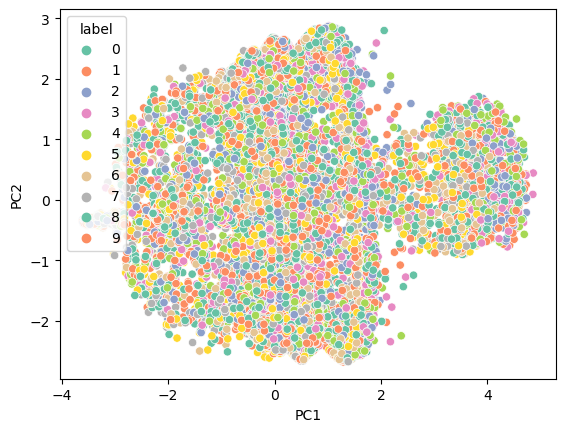

In [6]:
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca, palette='Set2')
plt.show()

In [7]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['label'] = y

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 22685 samples in 15.696s...
[t-SNE] Computed neighbors for 22685 samples in 424.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22685
[t-SNE] Computed conditional probabilities for sample 2000 / 22685
[t-SNE] Computed conditional probabilities for sample 3000 / 22685
[t-SNE] Computed conditional probabilities for sample 4000 / 22685
[t-SNE] Computed conditional probabilities for sample 5000 / 22685
[t-SNE] Computed conditional probabilities for sample 6000 / 22685
[t-SNE] Computed conditional probabilities for sample 7000 / 22685
[t-SNE] Computed conditional probabilities for sample 8000 / 22685
[t-SNE] Computed conditional probabilities for sample 9000 / 22685
[t-SNE] Computed conditional probabilities for sample 10000 / 22685
[t-SNE] Computed conditional probabilities for sample 11000 / 22685
[t-SNE] Computed conditional probabilities for sample 12000 / 22685
[t-SNE] Computed conditional probabilities for

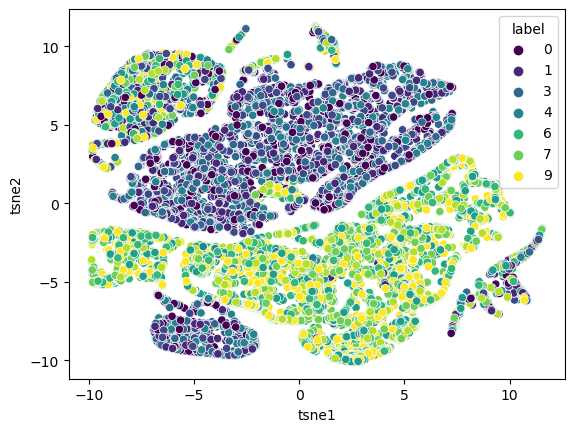

In [9]:
sns.scatterplot(x='tsne1', y='tsne2', hue='label', data=df_tsne, palette='viridis')
plt.show()